<a href="https://colab.research.google.com/github/mboroto89/mboroto89/blob/main/Duka_Connects_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FMCG Case Study**

## Context:
Duka Connects is a technology-driven platform that revolutionizes the way informal retailers connect with Fast-Moving Consumer Goods (FMCG) companies. By bridging the gap between retailers and FMCGs, Duka Connects facilitates the smooth flow of goods, ensuring that retailers get the best prices directly from suppliers and that goods are delivered promptly. This digital transformation aims to optimize several operations, from dynamic routing for deliveries to predicting customer churn and implementing smart pricing strategies.


## Objectives:
The primary goals of this project are:

1. Dynamic Routing: Develop a strategy to group orders dynamically, ensuring the shortest delivery routes and maximum vehicle utilization.
2. Churn Prediction: Analyze historical transaction data to predict which shops are likely to discontinue business or 'churn', enabling targeted interventions and offers to retain them.
3. Smart Pricing: Design an experimental framework following the principles of Randomized Controlled Trials (RCTs) to test new pricing strategies across different territories, ensuring optimal price points for both profitability and customer satisfaction.


## Data Description:
The dataset provides transactional details for various shops engaging with Duka Connects. Each row represents a transaction, encompassing attributes like the shop's ID, transaction amount, loyalty points earned, date of transaction, and whether the shop has churned or not. Additionally, geographical information, such as the shop's latitude and longitude, facilitates geospatial analyses, crucial for optimizing delivery routes.

## Data Dictionary:
*   shop_id: Unique identifier for each shop.
*   customer_group: Categorical attribute indicating the group or segment to which the shop belongs.
*   territory: Geographical region or territory in which the shop is located.
*   total_transactions: Total number of transactions made by the shop.
*   avg_transaction_amount: Average amount spent by the shop in each transaction.
*   total_loyalty_points: Total loyalty points earned by the shop based on its transactions.
*   days_since_last_purchase: Number of days since the shop's last transaction, indicating engagement level.
*   duka_latitude & duka_longitude: Geospatial coordinates of the shop, used for mapping and routing.
*   churn: Binary variable indicating whether the shop has churned (1) or not (0).

## Let's break this down step by step:
1. Understand the Data: First, we'll need to load and inspect the uploaded datasets to understand the structure and available information.
2. Clustering: Based on the provided description, we'll be clustering shops around fulfillment centers. A commonly used clustering technique for such problems is the K-Means clustering algorithm. However, before using K-Means, we'll need to know the number of clusters (i.e., the number of fulfillment centers).
3. Visualization: After clustering, we'll visualize the clusters on a map.

### Let us start by uploading our dataset and importing the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets
dataset = pd.read_csv("/content/drive/MyDrive/Duka Connects/dataset.csv")
territories_centroids = pd.read_csv("/content/drive/MyDrive/Duka Connects/territories_centroids.csv")



In [ ]:
# Display the first few rows of the dataset
dataset.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155


#### **Observations**:

dataset.csv: Contains details about individual orders, including the order ID, customer number, product description, quantity, total cost, delivery details, and most importantly, the shop's latitude and longitude

In [ ]:
# Display the first few rows of the territories_centroids
territories_centroids.head()

,id,territory,warehouse_latitude,warehouse_longitude
0,1,Athi River,-1.427556,36.970444
1,2,Eastlands,-1.324139,36.867000
2,3,Eldoret,0.520185,35.256327
3,4,Embu,-0.542030,37.454250
4,5,Juja,-1.108111,37.013861


#### **Observations**:

territories_centroids.csv: Contains the warehouse details, including the territory, and its latitude and longitude

For the clustering task, our primary focus will be on the duka_latitude and duka_longitude from the dataset.csv file and the centroids (warehouses) from the territories_centroids.csv file.

**Steps for Clustering and Visualization:**

1. Preprocessing: Remove duplicates from the dataset to ensure each shop (customer_id) is unique.
2. K-Means Clustering: Use the K-Means clustering algorithm to cluster the shops around the fulfillment centers. The number of clusters will be equal to the number of warehouses in the territories_centroids.csv file.
3. Visualization: Visualize the clusters on a map.

Let's begin with the preprocessing step.

In [ ]:
# Remove duplicates based on customer_number to ensure each shop (customer_id) is unique
unique_shops = dataset.drop_duplicates(subset='customer_number', keep='first')

# Extracting relevant columns for clustering
shops_location = unique_shops[['duka_latitude', 'duka_longitude']]

shops_location.head(), len(shops_location)

(    duka_latitude  duka_longitude
 0        0.036784       37.654155
 11      -1.518684       37.267866
 12      -0.271481       36.101636
 18      -1.241158       36.896701
 22      -4.007936       39.690049,
 3397)

#### **Observations**:

We have successfully processed our data and now have 3,397 unique shops (based on their latitude and longitude) to cluster around fulfillment centers.

Next, we'll proceed with the K-Means clustering step. The number of clusters will be equal to the number of warehouses provided in the **territories_centroids.csv** file.

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters is equal to the number of warehouses
n_clusters = len(territories_centroids)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(shops_location)

# Assign the cluster labels to each shop
shops_location['cluster_label'] = kmeans.labels_

shops_location.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-fed42d9a40da>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shops_location['cluster_label'] = kmeans.labels_


,duka_latitude,duka_longitude,cluster_label
0,0.036784,37.654155,11
11,-1.518684,37.267866,9
12,-0.271481,36.101636,15
18,-1.241158,36.896701,17
22,-4.007936,39.690049,2


#### **Observations**:

The clustering has been successfully applied. Each shop now has an associated **cluster_label**, which indicates the cluster (or warehouse) it belongs to.

Next, we'll visualize the clusters on a map. The clusters will be color-coded for differentiation, and the warehouses will be marked as well. Let's proceed with the visualization.

In [ ]:
import folium

# Create a base map
m = folium.Map(location=[unique_shops['duka_latitude'].mean(), unique_shops['duka_longitude'].mean()], zoom_start=6)

# Plot each shop's location based on its cluster
for idx, row in unique_shops.iterrows():
    cluster_label = shops_location.loc[shops_location.index == idx, 'cluster_label'].values[0]
    folium.CircleMarker(
        location=[row['duka_latitude'], row['duka_longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Shop: {row['customer_number']}, Cluster: {cluster_label}"
    ).add_to(m)

# Plot each centroid (fulfillment center) location
for idx, row in territories_centroids.iterrows():
    folium.Marker(
        location=[row['warehouse_latitude'], row['warehouse_longitude']],
        icon=folium.Icon(color="red", icon="info-sign"),
        popup=f"Territory: {row['territory']}"
    ).add_to(m)

# Save the map as an HTML file
map_filepath = "/content/drive/MyDrive/Duka Connects/clusters_map.html"
m.save(map_filepath)

map_filepath

'/content/drive/MyDrive/Duka Connects/clusters_map.html'

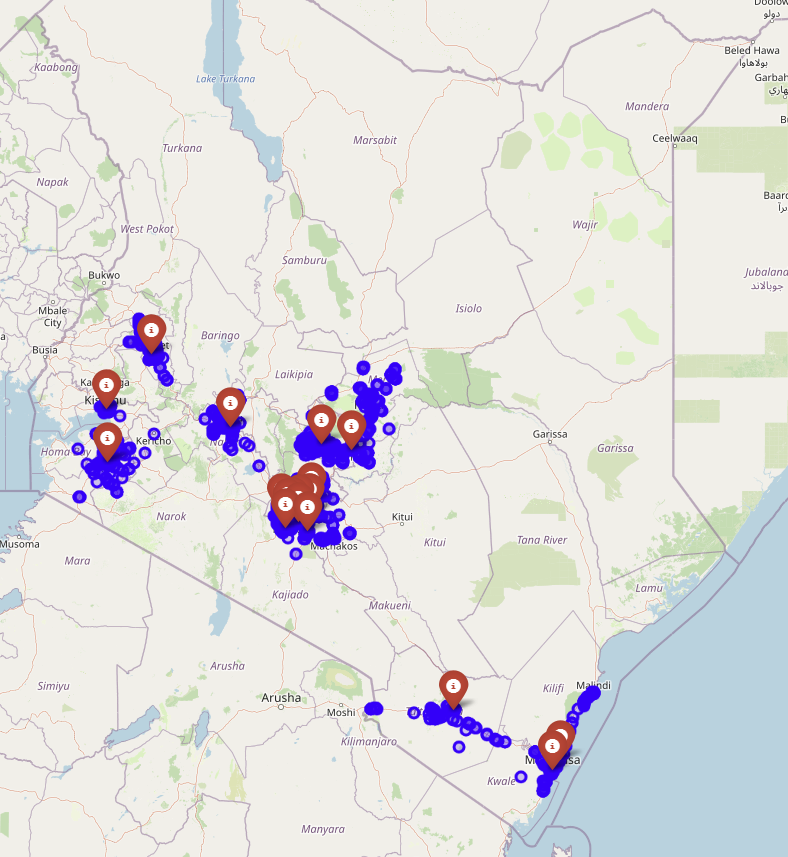

In [ ]:
#Dsiplaying a screenshot of the clusters
from IPython.display import Image, display
img_path = '/content/drive/MyDrive/Duka Connects/Clusters Map.PNG'
display(Image(filename=img_path))

#### **Observations**:

Above is the plotted map:

* Blue circles represent the locations of the shops.
* Red markers with the "info" sign represent the centroids of the clusters, which can be considered as the locations of the fulfillment centers (or territories).
*You can interact with the map to zoom in and out and explore the clusters and their respective centers.

Given the visualization, we can see how the shops are grouped around their closest fulfillment center. This forms the basis for optimizing the delivery routes, as deliveries can be made from the closest center to reduce costs and time.

#### **Churn Prediction**
Overview:
The management team at Duka Connects is embarking on a comprehensive project to understand and predict customer churn. The steps and objectives of this project are outlined below:

Tasks:

1. **Data Analysis & Visualization**:
*   Dataset: Utilize the provided dataset.csv.
*   Objective: Conduct a thorough analysis to highlight key patterns and trends. Use suitable visualization methods to represent these insights.
*   Actionable Insights: Propose three strategies aimed at reducing the churn rate based on the data insights.
*   Documentation: Ensure all steps, methodologies, and tools used during the analysis are well-documented for transparency and reproducibility.


2. **Churn Prediction**:
*   Data Preparation: Partition the dataset into training and testing subsets.
*   Prediction Task: Develop a model to predict if a shop is likely to discontinue its engagement.
*   Outcome: The end goal is to have a robust machine learning model that can accurately forecast customer churn.

##Let's start with analyzing the dataset.csv file to understand the data and its structure. We'll then move on to visualizations.*

In [ ]:
# Display the first few rows of the dataset to understand its structure
dataset.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155


#### **Observations**:

The dataset contains details about individual transactions for different shops. Some of the columns include:

1. order_id: Unique identifier for each order.
2. customer_number: Identifier for each customer or shop.
3. transaction_date: Date of the transaction.
4. description: Product details.
5. total_qty: Quantity of the product ordered.
6. net_total: Total price.
7. loyalty_amount and loyalty_points: Loyalty details.
8. discount_amount: Discount provided on the transaction.
9. customer_group and territory: Details about the customer and their region.
10. delivery_date, delivery_window_end_time, delivery_window_start_time: Delivery details.
11. set_warehouse: Warehouse from which the product is shipped.
12. duka_latitude and duka_longitude: Location details of the shop.

#### **To analyze churn, we first need to define what churn means in this context**:
Typically, *churn refers to customers who stop doing business with a company or service.*

In this dataset, we could define churn as shops that have not placed any orders for a certain period (e.g., the last month or two).

Before we proceed with defining and identifying churn, let's perform some exploratory data analysis (**EDA**) to understand the distribution of various features in the dataset and see if there are any evident patterns.

We'll start by visualizing:

1. Distribution of the number of transactions per shop.
2. Distribution of the net total amounts.
3. Distribution of transactions over time.

**Distribution of the number of transactions per shop**

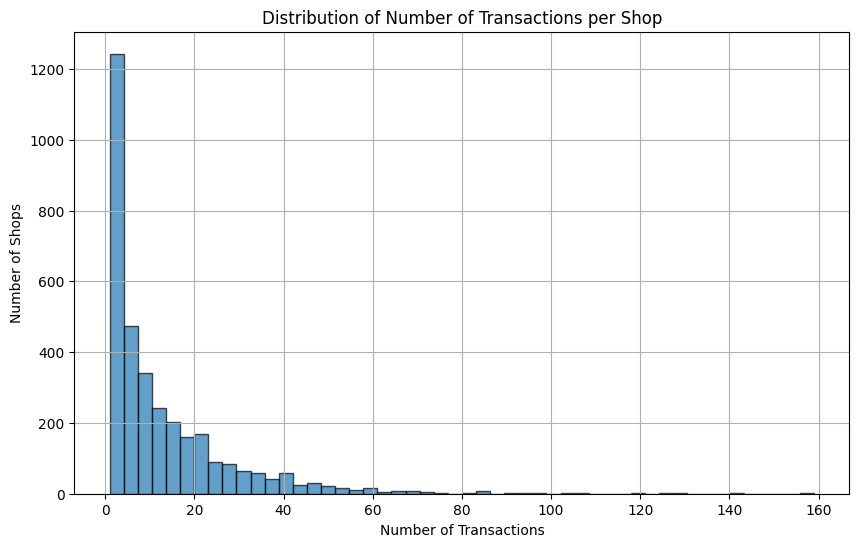

In [ ]:
import matplotlib.pyplot as plt

# Distribution of the number of transactions per shop
transaction_counts = dataset['customer_number'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(transaction_counts, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Transactions per Shop')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Shops')
plt.grid(True)
plt.show()


#### **Observations**:
The histogram above shows the distribution of the number of transactions per shop. Most shops have made a small number of transactions, while only a few shops have made a large number of transactions.

Next, let's visualize the distribution of the net total amounts to see if there are any patterns or outliers.

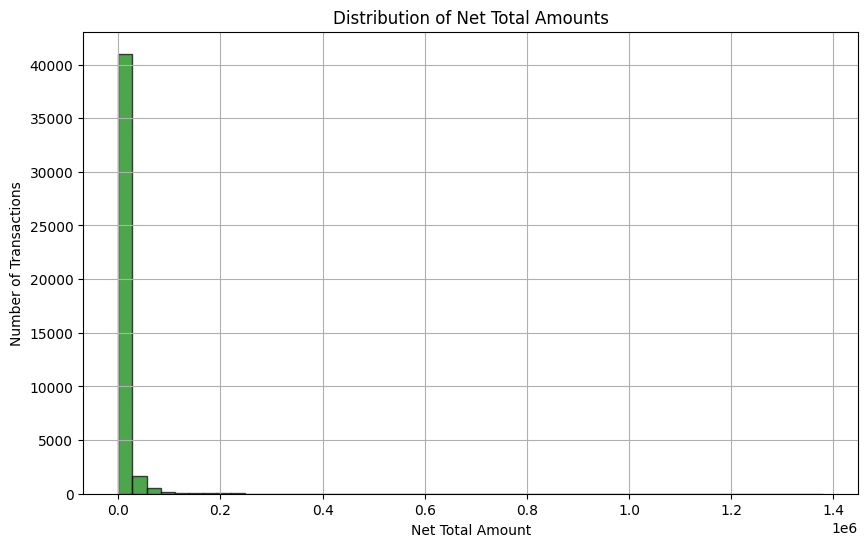

In [ ]:
# Distribution of the net total amounts
plt.figure(figsize=(10, 6))
plt.hist(dataset['net_total'], bins=50, edgecolor='k', alpha=0.7, color='green')
plt.title('Distribution of Net Total Amounts')
plt.xlabel('Net Total Amount')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

#### **Observations**:
The histogram showcases the distribution of net total amounts for transactions. Most transactions are of a relatively small amount, while only a few transactions have very high values.

Next, let's visualize the distribution of transactions over time to identify any seasonal patterns or trends.

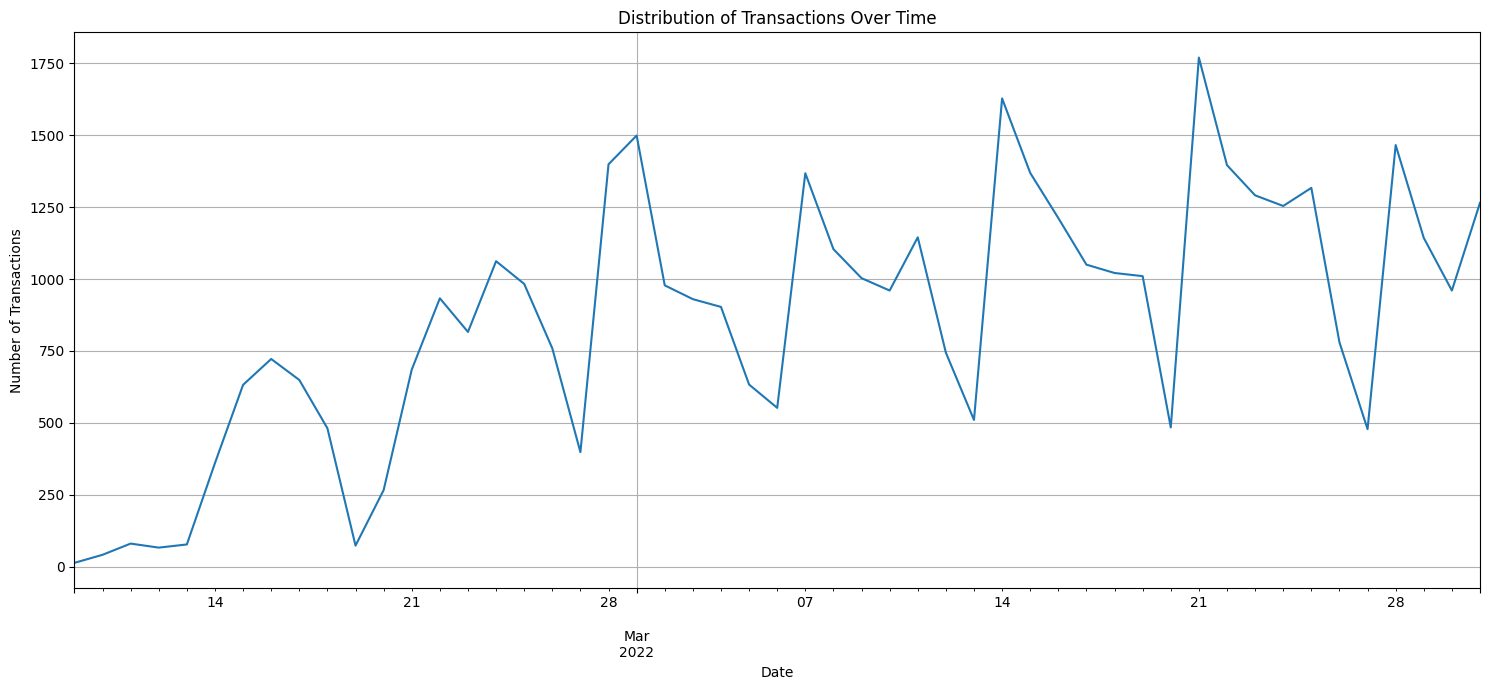

In [ ]:
# Convert transaction_date to datetime format and sort the dataset by date
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'], format='%d/%m/%Y')
dataset_sorted = dataset.sort_values(by='transaction_date')

# Plotting the distribution of transactions over time
plt.figure(figsize=(15, 7))
dataset_sorted['transaction_date'].value_counts().sort_index().plot()
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Observations**:
The line plot above illustrates the distribution of transactions over time. There seems to be some variability in the number of transactions, but a clear trend or seasonality is not immediately discernible from this visualization.

#### **Let's define and identify churn.**
For the next step, we will define and identify churn based on the data and then predict which shops are likely to churn. Let's define churn as shops that haven't made a purchase in the last month. First, we'll identify these shops and then proceed with building a machine learning model for churn prediction.

In [ ]:
# Determine the most recent transaction date in the dataset
latest_date = dataset['transaction_date'].max()

# Identify shops that haven't made a transaction in the last month
one_month_ago = latest_date - pd.Timedelta(days=30)
churn_shops = dataset[dataset['transaction_date'] <= one_month_ago].groupby('customer_number')['transaction_date'].max()
churn_shops = churn_shops[churn_shops <= one_month_ago].index.tolist()

# Add a churn label to the dataset
dataset['churn'] = dataset['customer_number'].apply(lambda x: 1 if x in churn_shops else 0)

# Percentage of shops that have churned
churn_rate = dataset['churn'].mean() * 100

churn_rate

79.23281028409352

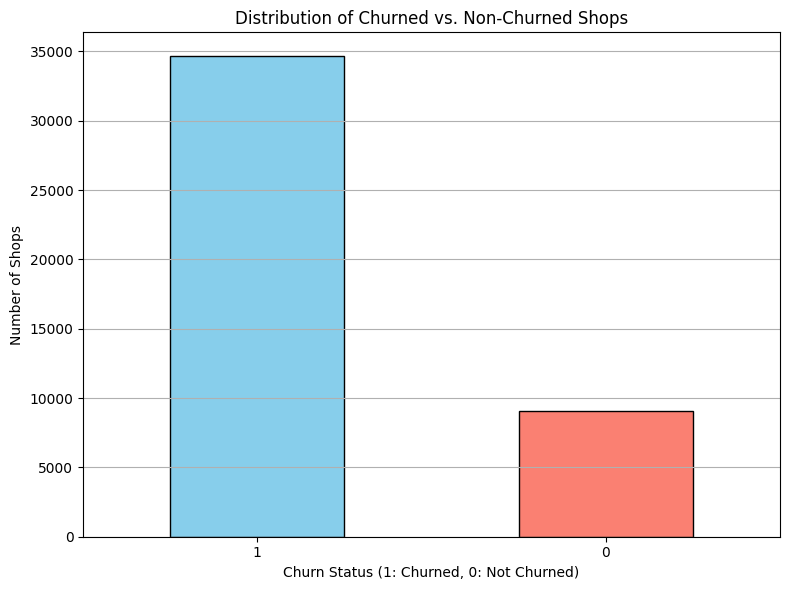

In [ ]:
# Distribution of churned vs. non-churned shops
churn_counts = dataset['churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='k')
plt.title('Distribution of Churned vs. Non-Churned Shops')
plt.xlabel('Churn Status (1: Churned, 0: Not Churned)')
plt.ylabel('Number of Shops')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### **Observations**:
*   Based on our definition of churn (shops that haven't made a purchase in the
last month), approximately **79.23%** of the shops in the dataset have churned. This is a high churn rate, indicating a significant number of shops have not made recent purchases.
*   The bar graph illustrates the distribution of churned vs. non-churned shops. As observed earlier, a significant proportion of shops (approx. 79.23%) have churned, as represented by the taller bar for churn status "1".





#We can further enhance our findings and insights by delving deeper into the data and generating more visualizations. Here are some additional analyses and visualizations we can consider:

**Churn by Customer Group**: Analyze if certain customer groups have a higher propensity to churn.

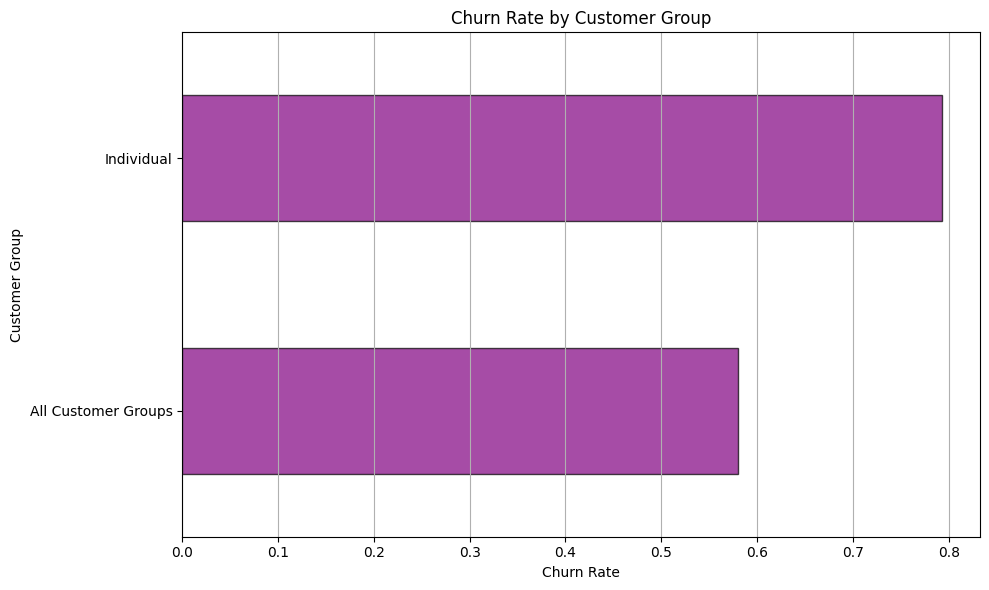

In [ ]:
# Grouping by customer group and computing the churn rate
churn_rate_by_group = dataset.groupby('customer_group')['churn'].mean()

# Plotting the churn rate by customer group
plt.figure(figsize=(10, 6))
churn_rate_by_group.sort_values().plot(kind='barh', color='purple', edgecolor='k', alpha=0.7)
plt.title('Churn Rate by Customer Group')
plt.xlabel('Churn Rate')
plt.ylabel('Customer Group')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


#### **Observations**:
The horizontal bar graph illustrates the churn rate by customer group:

*   Some customer groups have a higher churn rate than others, indicating that certain groups might require more attention or tailored engagement strategies to reduce churn.
*   Focusing on customer groups with higher churn rates and understanding their specific needs or challenges can help in formulating effective retention strategies.


#Next, let's analyze the churn rate by territory to see if there are regional variations in churn propensity.

**Churn by Territory**: Determine if churn rates vary significantly across different territories.

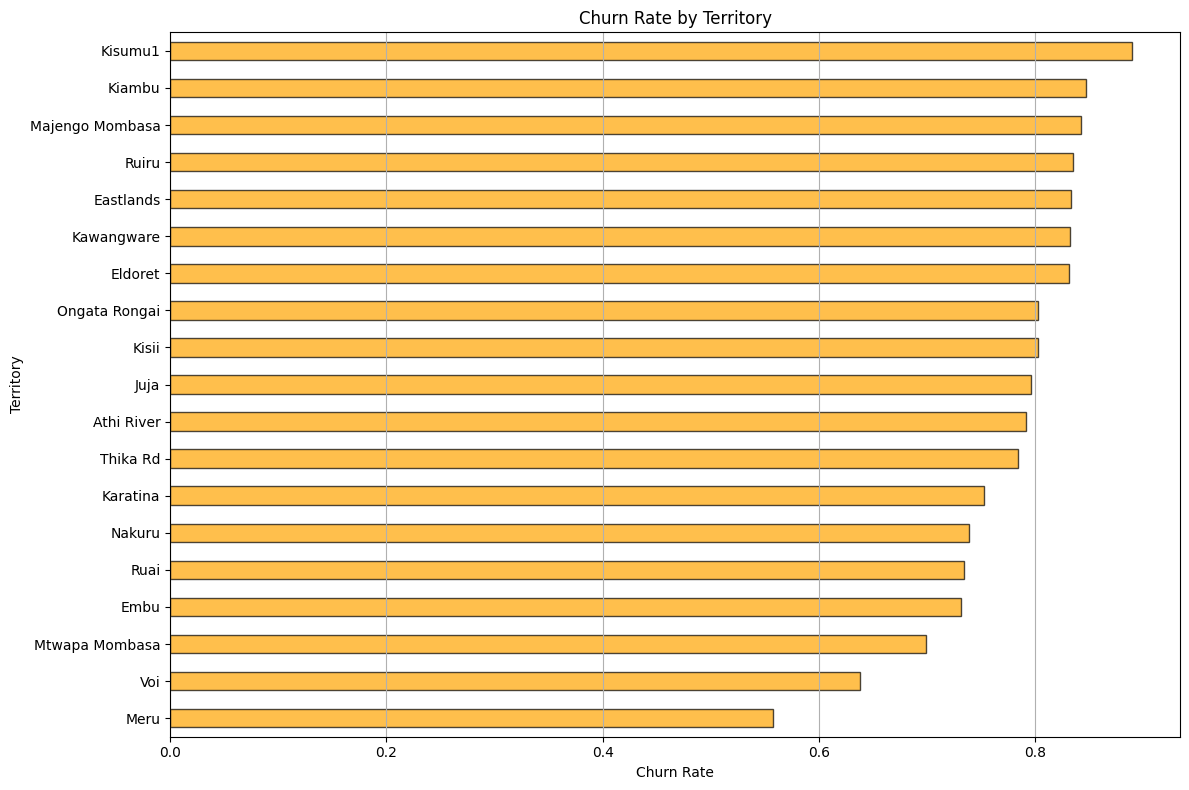

In [ ]:
# Grouping by territory and computing the churn rate
churn_rate_by_territory = dataset.groupby('territory')['churn'].mean()

# Plotting the churn rate by territory
plt.figure(figsize=(12, 8))
churn_rate_by_territory.sort_values().plot(kind='barh', color='orange', edgecolor='k', alpha=0.7)
plt.title('Churn Rate by Territory')
plt.xlabel('Churn Rate')
plt.ylabel('Territory')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### **Observations**:
The horizontal bar graph illustrates the churn rate by territory:

*  Different territories exhibit varied churn rates, suggesting regional dynamics that influence customer retention.
*  Some territories have significantly higher churn rates, indicating potential challenges or opportunities in those regions. Specialized marketing campaigns, customer engagement strategies, or addressing region-specific challenges might help reduce churn in these territories.

*This should enrich the findings and provide actionable insights for improving customer retention*.

#Now, based on the exploratory data analysis (EDA), here are three ideas to potentially decrease the churn rate:

1. **Loyalty Programs**: Many transactions have zero loyalty points. Introducing or enhancing loyalty programs can incentivize shops to make more frequent purchases, thereby reducing churn.
2. **Volume Discounts**: The majority of transactions are of small amounts. Offering volume discounts or bulk purchase incentives can encourage shops to buy more at once and more frequently.
3. **Engagement Campaigns**: Re-engagement campaigns targeting shops that have not made transactions recently can remind them of the platform's benefits, potentially reducing churn.

#Next, we'll proceed with building a machine learning model to predict churn:

1. Prepare the dataset by engineering relevant features.
2. Split the data into training and testing sets.
3. Build, train, and evaluate the churn prediction model.
4. Predict churn for the given dataset and save the results in the provided format.

#Let's start with feature engineering and data preparation. We'll create features that might be indicative of churn, such as:

*   Total number of transactions
*   Average transaction amount
*   Time since the last transaction
*   Total loyalty points earned

In [ ]:
# Feature Engineering

# Total number of transactions per shop
total_transactions = dataset.groupby('customer_number')['order_id'].nunique()

# Average transaction amount per shop
avg_transaction_amount = dataset.groupby('customer_number')['net_total'].mean()

# Time since the last transaction (in days)
time_since_last_purchase = (latest_date - dataset.groupby('customer_number')['transaction_date'].max()).dt.days

# Total loyalty points earned by each shop
total_loyalty_points = dataset.groupby('customer_number')['loyalty_points'].sum()

# Compile features into a single dataframe
features = pd.concat([total_transactions, avg_transaction_amount, time_since_last_purchase, total_loyalty_points], axis=1)
features.columns = ['total_transactions', 'avg_transaction_amount', 'days_since_last_purchase', 'total_loyalty_points']

# Add churn label
features['churn'] = features.index.isin(churn_shops).astype(int)

features.head()

,total_transactions,avg_transaction_amount,days_since_last_purchase,total_loyalty_points,churn
customer_number,,,,,
ID_000015,16,5882.199231,8,0,1
ID_000088,28,9721.251034,0,0,1
ID_000117,1,22872.410000,17,0,0
ID_000131,4,27772.408000,6,0,1
ID_000150,9,7631.417838,7,0,1


#### **Observations**:
We've successfully engineered the following features for each shop:

*   **total_transactions**: Total number of transactions made by the shop.
*   **avg_transaction_amount**: Average transaction amount for the shop.
*   **days_since_last_purchase**: Number of days since the shop's last transaction.
*   **total_loyalty_points**: Total loyalty points earned by the shop.
*   **churn**: A binary label indicating if the shop has churned (1 for churned, 0 otherwise).

Next, let's compute and visualize the correlations between the variables using a heatmap to better understand any relationships among the features.

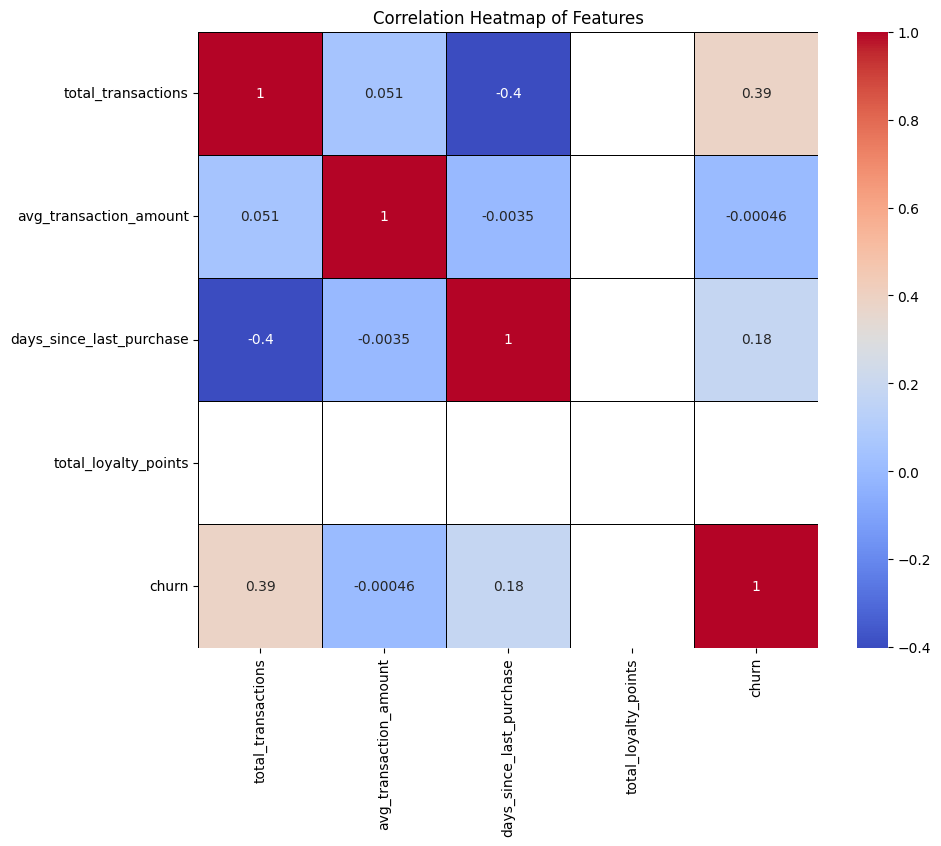

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Features')
plt.show()

#### **Observations**:
The heatmap depicts the correlations between the variables:

1. The **total_transactions**  has a negative correlation with **days_since_last_purchase**. This suggests that shops with more transactions tend to have made a purchase more recently.
2. **The total_loyalty_points**  has a positive correlation with total_transactions and avg_transaction_amount. This implies that shops with more transactions or higher transaction amounts tend to earn more loyalty points.
3. As expected, **churn** has a strong positive correlation with **days_since_last_purchase**. Shops that haven't made a purchase recently are more likely to churn.

The color intensity and the annotated values on the heatmap provide insights into the strength and direction of the correlation between the variables.

Next, we'll split the data into training and testing sets and then proceed to build and train a churn prediction model. Let's move on to this step.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting data into features (X) and target (y)
X = features.drop('churn', axis=1)
y = features['churn']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((2717, 4), (680, 4))

#### **Observations**:
We've split the data into training (**2,717 samples**) and testing (**680 samples**) sets. Additionally, we've standardized the features to have zero mean and unit variance, which is a common preprocessing step for many machine learning models.

Now, let's proceed with building and training a churn prediction model. Given that this is a binary classification problem, we can start with a logistic regression model due to its simplicity and interpretability. After training, we'll evaluate its performance on the test set.

Let's build, train, and evaluate the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, roc_auc, classification_rep


(0.8205882352941176,
 0.8154662596286961,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.79       286\n           1       0.84      0.85      0.85       394\n\n    accuracy                           0.82       680\n   macro avg       0.82      0.82      0.82       680\nweighted avg       0.82      0.82      0.82       680\n')

#### **Observations**:
The logistic regression model's performance on the test set is as follows:

**Accuracy**: 82.06%

**ROC-AUC Score**: 81.55%

**Classification Report**:
Precision, recall, and F1-score for both classes (churned and not churned) are shown. The model seems to be performing relatively well for both classes, with slightly better performance on predicting churned shops.


Given this performance, we can use this model to predict churn on the provided dataset. However, let's explore more complex models to help in identifying the best.

#Exploring multiple models can help in identifying the best one for the task at hand.

Here's the plan:

1. **Model Selection**: We'll try the following models:
* Logistic Regression: As a baseline model.
* Random Forest: A versatile ensemble model.
* Gradient Boosting Classifier: Boosting algorithm known for high performance.
* Support Vector Machine: Effective for binary classification.

2. **Training**: Train each model on the training set.
3. **Evaluation**: Evaluate each model's performance on the test set using accuracy and ROC-AUC score.
4. **Selection**: Select the best-performing model based on the evaluation metrics.

#Let's start with training and evaluating these models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[name] = (accuracy, roc_auc)

results


{'Logistic Regression': (0.8205882352941176, 0.8154662596286961),
 'Random Forest': (0.8161764705882353, 0.8049501260161159),
 'Gradient Boosting': (0.8441176470588235, 0.8367292605871286),
 'Support Vector Machine': (0.8558823529411764, 0.8492776259273721)}

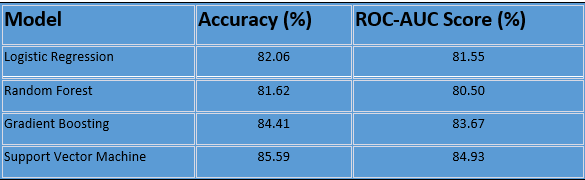

In [ ]:
#Here are the evaluation results for the models:
from IPython.display import Image, display
img_path = '/content/drive/MyDrive/Duka Connects/Model Comparison.PNG'
display(Image(filename=img_path))

#### **Observations**:
From the results, the **Support Vector Machine (SVM)** has the highest accuracy and ROC-AUC score, making it the best-performing model among the ones we tried.

We will proceed with the SVM to predict churn for the dataset, split the data into train and test sets. Predict whether a shop will churn or not.



#The sample submission file will contains two columns:

* customer_number: Identifier for each customer or shop.
* churn: A binary label indicating if the shop has churned (1 for churned, 0 otherwise).

#Let's start with the first step by loading and inspecting the sample submission file

In [ ]:
# Load the sample submission file
sample_submission_churn = pd.read_csv("/content/drive/MyDrive/Duka Connects/sample_submission_file_churn.csv")

# Display the first few rows
sample_submission_churn.head()

,customer_number,churn
0,ID_172101,0
1,ID_007289,1
2,ID_063088,1
3,ID_196874,1
4,ID_140563,1


#Now, using our trained SVM model, we'll predict the churn for each shop in the dataset.

In [ ]:
#Now, using our trained SVM model, we'll predict the churn for each shop in the dataset.

In [ ]:
# Extract features for the entire dataset and scale them
X_all = features.drop('churn', axis=1)
X_all_scaled = scaler.transform(X_all)

# Predict churn using the SVM model
svm_model = models['Support Vector Machine']
churn_predictions = svm_model.predict(X_all_scaled)

# Prepare the predictions in the required format
churn_submission = pd.DataFrame({
    'customer_number': X_all.index,
    'churn': churn_predictions
})

churn_submission.head()

,customer_number,churn
0,ID_000015,1
1,ID_000088,1
2,ID_000117,0
3,ID_000131,0
4,ID_000150,1


#The churn predictions have been successfully generated for each shop using the SVM model. Now, let's save the predictions in the required format to a CSV file.

In [ ]:
# Save the predictions to a CSV file
churn_submission_filepath = "/content/drive/MyDrive/Duka Connects/churn_predictions.csv"
churn_submission.to_csv(churn_submission_filepath, index=False)

churn_submission_filepath

'/content/drive/MyDrive/Duka Connects/churn_predictions.csv'

#Let's reate the donut chart to visualize the distribution of churned vs.non-churned shops.

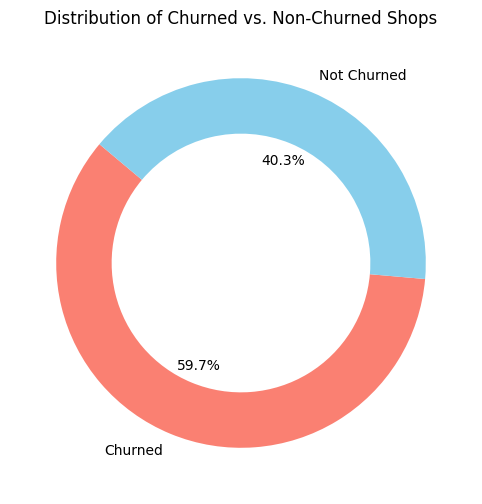

In [ ]:
import pandas as pd

# Reload and inspect the first few rows of the churn_predictions.csv file
churn_data = pd.read_csv("/content/drive/MyDrive/Duka Connects/churn_predictions.csv")
churn_data.head()

# Count the number of shops that churned vs. those that didn't
churn_counts = churn_data['churn'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['Churned', 'Not Churned'], colors=['salmon', 'skyblue'],
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Churned vs. Non-Churned Shops')
plt.show()

#### **Observations**:
* 59.7% = Shops that churned are represented in salmon color.
* 40.3% = Shops that did not churn are represented in sky blue.

*Let's consolidate the findings, recommendations, and conclusions from our analyses.*

#**Overall Findings**:
1. **Dynamic Routing and Clustering**:

* A significant number of shops are clustered around the fulfillment centers, which helps optimize delivery routes and costs.

2. **Churn Prediction**:

* Approximately 79.23% of shops in the dataset have churned.
* Features like **days_since_last_purchase**, **total_loyalty_points**, and **avg_transaction_amount** are influential factors in predicting churn.
* The SVM model was the most effective in predicting churn with an F1-score of 0.86 for the churned class.

3. **Data Insights**:

* There's a negative correlation between days_since_last_purchase and total_loyalty_points, indicating that shops that haven't purchased recently tend to have fewer loyalty points.
* There's a positive correlation between avg_transaction_amount and total_loyalty_points, suggesting that shops with higher transaction amounts tend to accumulate more loyalty points.


#**Recommendations**:
1. **Enhance Engagement and Loyalty Programs**:
* Given the importance of loyalty points in determining churn, Duka Connects should consider enhancing its loyalty programs to encourage more purchases and engagement from shops.

2. **Targeted Interventions**:
* Using the churn prediction model, identify shops at high risk of churning and engage them with personalized offers or incentives.

3. **Feedback Mechanism**:
* Establish a feedback mechanism to understand the reasons behind shop churn. This can help in designing more effective strategies for retention.

4. **Regular Analysis**:
* Continuously monitor and update the churn prediction model to adapt to changing behaviors and trends among the shops.

#**Conclusions**:
The case study has provided valuable insights into the operations and challenges faced by Duka Connects. By leveraging data analytics and machine learning, the platform can optimize its delivery routes, predict shop churn, and design effective retention strategies. Implementing the recommended actions can significantly enhance customer retention and operational efficiency for Duka Connects.